In [39]:
#import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [30]:
#dataset
dataset = pd.read_csv('log2.csv')
dataset['Action'] = np.where(dataset['Action'] == 'allow', 1, 0) #encoding dependant output
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding data
    Action the dependant variable contain 3 targets
* allow -> [100]
* deny  -> [010]
* drop  -> [001]

#Encoding data
dummies = pd.get_dummies(dataset.Action)  
merged = pd.concat([dataset,dummies],axis=1)
final = merged.drop(['Action'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

## Performing Feature Scalling
* As you can see in the dataset, all values are not in the same range,  and that requires a lot of time for calculation. So to    overcome this problem, we perform feature scaling.


* Feature scaling help us to normalize the data within a particular range.

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.fit_transform(X_test)

In [34]:
X.shape

(65532, 11)

In [35]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    
    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a Deep Neural Net Model

* input 11 unites, for 11 features we have in Dataset
* hidden 150 unites estimated for better performance
* output 3 unites we have [100], [010], [001] three labes index of 1 will define the target

In [40]:
def create_model(my_learning_rate):
    model = tf.keras.models.Sequential()
  
  # Define the input layer and first hidden layer.
    model.add(Dense(units=11, kernel_initializer='normal', activation='relu'))
    
# Define the input layer and first hidden layer.
    model.add(Dense(units=150, activation='relu'))
  # Define a dropout regularization layer.
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. 
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))     
                           
  # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [41]:
def train_model(model, train_features, train_label, epochs,
                batch_size, validation_split):
    
    history = model.fit(train_features, train_label, batch_size,
                      epochs=epochs, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist 

Epoch 1/10
1398/1398 [==============================] - 7s 4ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0091 - val_accuracy: 0.9980
Epoch 2/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.0097 - val_accuracy: 0.9976
Epoch 3/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.0076 - val_accuracy: 0.9979
Epoch 4/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0114 - val_accuracy: 0.9980
Epoch 5/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.0101 - val_accuracy: 0.9981
Epoch 6/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0073 - val_accuracy: 0.9981
Epoch 7/10
1398/1398 [==============================] - 5s 4ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0090 - val_accuracy:

[0.07499954104423523, 0.9980162978172302]

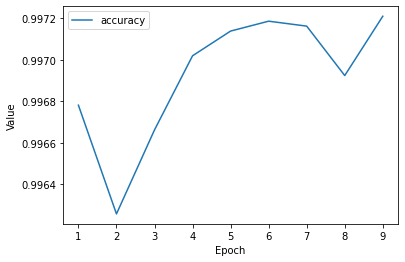

In [42]:
#hyperparameters
learning_rate = 0.003 #
epochs = 10
batch_size = 30 #
validation_split = 0.2 #

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train_normalized, y_train, 
                           epochs, batch_size, validation_split)
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=X_test_normalized, y=y_test, batch_size=batch_size)

In [43]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 150)               1800      
                                                                 
 batch_normalization_2 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 151       
                                                                 
Total params: 2,683
Trainable params: 2,383
Non-trainable params: 300
__________________________________________________

In [ ]:
#testing and virtualize